IMPORTACIONES


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


Preparacion de entorno

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Num GPUs Available:  1
Found GPU at: /device:GPU:0


Montando los data sets

In [3]:
from google.colab import drive
drive.mount('/content/drive')
ruta_dataset_entrenamiento = "/content/drive/My Drive/FinalCiencias2/final/data4/training"
ruta_dataset_prueba = "/content/drive/My Drive/FinalCiencias2/final/data4/test"
ruta_dataset_validacion = "/content/drive/My Drive/FinalCiencias2/final/data4/validation"
numeroclass = 6


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Pre procesamiento 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3)
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3)

Cargando datos

In [ ]:
train_generator = train_datagen.flow_from_directory(ruta_dataset_entrenamiento,target_size=(350,350),color_mode='grayscale',batch_size=32,class_mode='categorical',shuffle=True)
test_generator = test_datagen.flow_from_directory(ruta_dataset_prueba,target_size=(350,350),color_mode='grayscale',batch_size=3,class_mode='categorical',shuffle=False)
validation_generator = validation_datagen.flow_from_directory(ruta_dataset_validacion,target_size=(350,350),color_mode='grayscale',batch_size=32,class_mode='categorical',shuffle=True)


Found 6848 images belonging to 6 classes.
Found 3388 images belonging to 6 classes.
Found 3410 images belonging to 6 classes.


Cargando el modelo

In [ ]:
model2 = Sequential()

In [ ]:
model= Sequential()

model.add(Conv2D(64, (4, 4), padding='same', input_shape=(350, 350, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4))) #160x160
model.add(Dropout(0.2))


model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.2))


model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# La capa de salida debe tener el mismo número de clases
model.add(Dense(numeroclass, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 350, 350, 64)      1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 87, 87, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 87, 87, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 32)        4

Compilación

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Training
# Funciones callbacks
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5), ModelCheckpoint(filepath="/content/drive/My Drive/modeloneurona.h5", monitor='val_loss', save_best_only=True, verbose=1,mode='min')]


step_size_train=train_generator.n/train_generator.batch_size
step_size_validation=validation_generator.n/validation_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   validation_steps = step_size_validation,
                   epochs=40, callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
214/214 [==============================] - ETA: 0s - loss: 0.9489 - accuracy: 0.5334 
Epoch 00001: val_loss improved from inf to 1.09094, saving model to /content/drive/My Drive/modeloneurona.h5
214/214 [==============================] - 3415s 16s/step - loss: 0.9489 - accuracy: 0.5334 - val_loss: 1.0909 - val_accuracy: 0.4806
Epoch 2/40
214/214 [==============================] - ETA: 0s - loss: 0.9124 - accuracy: 0.5650
Epoch 00002: val_loss improved from 1.09094 to 0.94855, saving model to /content/drive/My Drive/modeloneurona.h5
214/214 [==============================] - 101s 470ms/step - loss: 0.9124 - accuracy: 0.5650 - val_loss: 0.9485 - val_accuracy: 0.5959
Epoch 3/40
214/214 [==============================] - ETA: 0s - loss: 0.8052 - accuracy: 0.6725
Epoch 00003: val_loss improved from 0.94855 to 0.81619, saving model to /content/drive/My Drive/modeloneurona.h5
214/214 [======================

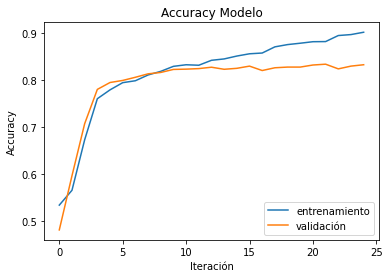

In [ ]:
# Gráfica de la métrica de precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='lower right')
plt.show()


Evaluacion

In [ ]:
model_loaded = load_model("/content/drive/My Drive/modeloneurona.h5")

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_loaded.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

Instructions for updating:
Please use Model.evaluate, which supports generators.
1130/1129 [==============================] - 1054s 933ms/step - loss: 1.4223 - accuracy: 0.7016
[1.4223301410675049, 0.7015938758850098]


In [ ]:
y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
y_pred_prob

array([[4.4920962e-02, 1.6441372e-03, 1.1367229e-01, 6.7757672e-01,
        1.4826508e-01, 1.3920785e-02],
       [3.6451440e-02, 1.3258166e-03, 2.3490235e-01, 6.2324774e-01,
        9.4408497e-02, 9.6642030e-03],
       [6.6947259e-02, 8.8421541e-04, 1.1450898e-01, 7.3544574e-01,
        7.5701982e-02, 6.5118610e-03],
       ...,
       [5.0562870e-02, 8.8882334e-05, 4.7649067e-02, 8.5433966e-01,
        8.6664790e-03, 3.8693119e-02],
       [6.1771828e-03, 5.1049119e-06, 2.0952686e-03, 6.5507603e-01,
        1.2604590e-02, 3.2404181e-01],
       [4.0617332e-02, 2.0789957e-04, 7.2604373e-02, 6.5884334e-01,
        2.1289241e-02, 2.0643786e-01]], dtype=float32)

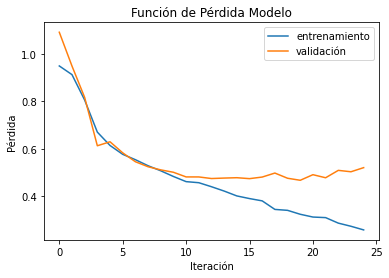

In [ ]:
# Gráfica de la función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()

In [ ]:
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[   4    0   26   32    0    3]
 [   0    0   82  118    0    0]
 [   2    0 1154  295    0    3]
 [   9    0  184 1211    1    9]
 [   0    0   72   98    0    0]
 [   1    0   14   57    0   13]]


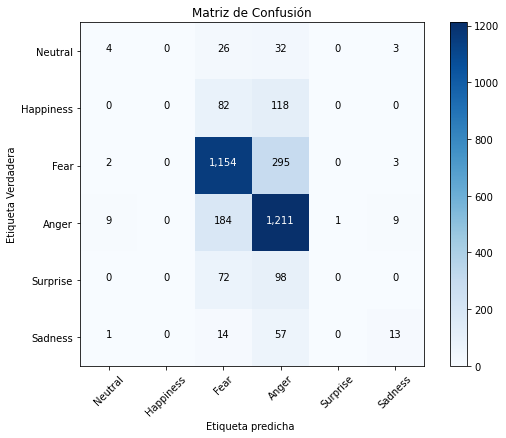

In [ ]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ['Neutral', 'Happiness', 'Fear', 'Anger','Surprise','Sadness']

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()

MOBILENETV2 Y MOBILENET

In [7]:
from tensorflow.keras import applications

Funciones de transferencia de conocimiento 

In [ ]:
def mv():
  mnv2 = applications.mobilenet.MobileNet()
  mnv2.summary()
  modemv2 = Sequential()
  for capa in mnv2.layers:
    modemv2.add(capa)
  modemv2.summary()  
  modemv2.pop()
  modemv2.summary()
  for layer in modemv2.layers:
    layer.trainable=False
  modemv2.add(Dense(6,activation='softmax'))
  modemv2.summary() 
  return modemv2

def mv22():
  mnv2 = applications.mobilenet_v2.MobileNetV2()
  mnv2.summary()
  modemv2 = Sequential()
  for capa in mnv2.layers:
    modemv2.add(capa)
  modemv2.summary()  
  modemv2.pop()
  modemv2.summary()
  for layer in modemv2.layers:
    layer.trainable=False
  modemv2.add(Dense(6,activation='softmax'))
  modemv2.summary() 
  return modemv2




In [ ]:
#vg6 = modeloVgg16()
mnvv = mv()
print("//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")
mnvv2 = mv()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
train_generator2 = train_datagen.flow_from_directory(ruta_dataset_entrenamiento,target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)
test_generator2 = test_datagen.flow_from_directory(ruta_dataset_prueba,target_size=(224,224),color_mode='rgb',batch_size=1,class_mode='categorical',shuffle=False)
validation_generator2 = validation_datagen.flow_from_directory(ruta_dataset_validacion,target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)

Found 6848 images belonging to 6 classes.
Found 3388 images belonging to 6 classes.
Found 3410 images belonging to 6 classes.


Entrenamiento MN2

In [ ]:
mnvv.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mnvv2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5), ModelCheckpoint(filepath="/content/drive/My Drive/modelomn2.h5", monitor='val_loss', save_best_only=True, verbose=1,mode='min')]


step_size_train=train_generator2.n/train_generator2.batch_size
step_size_validation=validation_generator2.n/validation_generator2.batch_size
history = mnvv.fit_generator(generator=train_generator2,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator2,
                   validation_steps = step_size_validation,
                   epochs=40, callbacks=callbacks)

Epoch 1/40
214/214 [==============================] - ETA: 0s - loss: 0.9412 - accuracy: 0.7018
Epoch 00001: val_loss improved from inf to 0.66741, saving model to /content/drive/My Drive/modelomn2.h5
214/214 [==============================] - 2899s 14s/step - loss: 0.9412 - accuracy: 0.7018 - val_loss: 0.6674 - val_accuracy: 0.7707
Epoch 2/40
214/214 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.7850
Epoch 00002: val_loss improved from 0.66741 to 0.60905, saving model to /content/drive/My Drive/modelomn2.h5
214/214 [==============================] - 125s 582ms/step - loss: 0.6051 - accuracy: 0.7850 - val_loss: 0.6091 - val_accuracy: 0.7880
Epoch 3/40
214/214 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.8013
Epoch 00003: val_loss improved from 0.60905 to 0.56873, saving model to /content/drive/My Drive/modelomn2.h5
214/214 [==============================] - 126s 588ms/step - loss: 0.5559 - accuracy: 0.8013 - val_loss: 0.5687 - val_ac

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5), ModelCheckpoint(filepath="/content/drive/My Drive/modelomnet.h5", monitor='val_loss', save_best_only=True, verbose=1,mode='min')]


step_size_train=train_generator2.n/train_generator2.batch_size
step_size_validation=validation_generator2.n/validation_generator2.batch_size
history = mnvv2.fit_generator(generator=train_generator2,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator2,
                   validation_steps = step_size_validation,
                   epochs=40, callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
214/214 [==============================] - ETA: 0s - loss: 0.8982 - accuracy: 0.7110 
Epoch 00001: val_loss improved from inf to 0.64952, saving model to /content/drive/My Drive/modelomnet.h5
214/214 [==============================] - 7174s 34s/step - loss: 0.8982 - accuracy: 0.7110 - val_loss: 0.6495 - val_accuracy: 0.7760
Epoch 2/40
214/214 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.7846
Epoch 00002: val_loss did not improve from 0.64952
214/214 [==============================] - 138s 644ms/step - loss: 0.6208 - accuracy: 0.7846 - val_loss: 0.6614 - val_accuracy: 0.7724
Epoch 3/40
214/214 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.8147
Epoch 00003: val_loss did not improve from 0.64952
214/214 [==============================] - 137s 640ms/step - loss: 0.5336 - accuracy: 0.8147 - val_loss: 0.7161 - val_accuracy: 0.7674
Epoch 4/40
214/214 [===